In [1]:
import joblib
import matplotlib.pyplot as plt
#from quadratic_weighted_kappa_edit import quadratic_weighted_kappa, onehalf_weighted_kappa, weighted_matrix, onehalf_weighted_matrix, linear_weighted_kappa
import numpy as np
from sklearn.metrics import cohen_kappa_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import krippendorff
from pyagree import bangdiwala_b, scott_pi

c:\users\20167947\appdata\local\programs\python\python38\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
prev_list = []

acc_list = []
ck_list = []
lwk_list = []
qwk_list = []
scott_list = []
bang_list = []
krip_list = []

### Agreement Matrix

In [209]:
M = np.array([[151,149,11,1],[71,35,85,2],[1,112,77,61],[0,4,112,900]])
M

array([[151, 149,  11,   1],
       [ 71,  35,  85,   2],
       [  1, 112,  77,  61],
       [  0,   4, 112, 900]])

In [195]:
#joblib.dump(M, 'matrix_6')

In [196]:
np.sum(M)

1772

In [197]:
1772

1772

### Load Matrix

In [253]:
M = joblib.load('matrix_7')
M

array([[ 151,  149,   11,    1],
       [  71, 1000,   85,    2],
       [   1,  112,    7,   61],
       [   0,    4,  112,    5]])

In [5]:
M = np.array([[0,0,0,0,0],[0,0,1,0,1],[0,0,0,0,0],[1,0,0,1,0],[0,0,1,0,995]])
M

array([[  0,   0,   0,   0,   0],
       [  0,   0,   1,   0,   1],
       [  0,   0,   0,   0,   0],
       [  1,   0,   0,   1,   0],
       [  0,   0,   1,   0, 995]])

In [6]:
np.sum(M)

1000

### Convert matrix to array of ratings

In [8]:
def extract_array_from_cm(cm, k):
    r1 = []
    r2 = []
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            if i == j:       
                for x in range(cm[i][j]):
                    r1.extend([k[i]])
                    r2.extend([k[j]])
            else:
                for x in range(cm[i][j]):            
                    r1.extend([k[i]])                
                    r2.extend([k[j]])
    return r1, r2

#k = [1,2,3,4]
k = [5,6,7,8,9]
r1, r2 = extract_array_from_cm(M, k)

### Prepare array format for Krippendorff's alpha

In [9]:
r1_ = np.array(r1).reshape(1,-1)
r2_ = np.array(r2).reshape(1,-1)

r = np.concatenate((r1_,r2_), axis=0)
r

array([[6, 6, 8, ..., 9, 9, 9],
       [7, 9, 5, ..., 9, 9, 9]])

In [10]:
# M = np.array([[14,1,2,1],[5,12,3,4],[7,4,12,3],[6,7,5,14]])
# M

In [16]:
from collections import Counter
Counter(r[1])

Counter({7: 2, 9: 996, 5: 1, 8: 1})

In [11]:
len(M)

5

### Prevalence

In [17]:
prevalence_list = []

for i in range(len(M) - 1):
    for j in range(i+1, len(M)):
        prevalence_list.append(abs(M[i][i] - M[j][j]))

prev = np.sum(prevalence_list)
prevalence = prev / (np.sum(M) * len(M) * (len(M)-1) / 2)
print(prevalence)

0.3982


In [318]:
prev_list

[0.25103461249059444, 0.25103461249059444, 0.2943002257336343]

In [319]:
prev_list.append(prevalence)
prev_list

[0.25103461249059444,
 0.25103461249059444,
 0.2943002257336343,
 0.2943002257336343]

In [18]:
acc = accuracy_score(r1,r2)
ck = cohen_kappa_score(r1,r2)
lwk = cohen_kappa_score(r1, r2, weights='linear')
qwk = cohen_kappa_score(r1, r2, weights='quadratic')
scott = scott_pi(np.matrix(M))
bang = bangdiwala_b(M)
krip = krippendorff.alpha(r)

acc_list.append(acc)
ck_list.append(ck)
lwk_list.append(lwk)
qwk_list.append(qwk)
scott_list.append(scott)
bang_list.append(bang)
krip_list.append(krip)

In [321]:
# ck

In [322]:
# acc

In [19]:
qwk_list

[0.4872480827537008]

In [20]:
k = (0.99856 - 0.9972) / (1 - 0.9972)
k

0.48571428571429137

### Plot Agreement Metrics Comparison

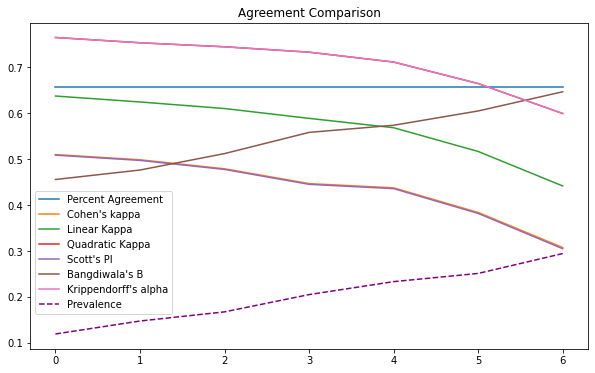

In [254]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title("Agreement Comparison")
plt.plot(acc_list, label='Percent Agreement')
plt.plot(ck_list, label='Cohen\'s kappa')
plt.plot(lwk_list, label='Linear Kappa')
plt.plot(qwk_list, label='Quadratic Kappa')
plt.plot(scott_list, label='Scott\'s PI')
plt.plot(bang_list, label='Bangdiwala\'s B')
plt.plot(krip_list, label='Krippendorff\'s alpha')
plt.plot(prev_list, label='Prevalence', linestyle='dashed', c ='purple')
#plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(0,0.5))
plt.savefig('comparison.png')

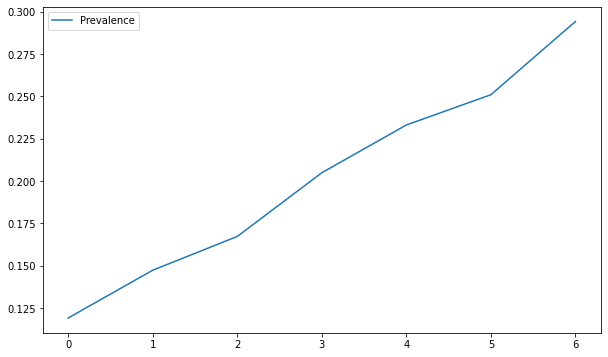

In [239]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(prev_list, label='Prevalence')
plt.legend()
#plt.savefig('comparison.png')

### Agreement Metrics

In [62]:
ck = cohen_kappa_score(r1,r2)
lwk = cohen_kappa_score(r1, r2, weights='linear')
qwk = cohen_kappa_score(r1, r2, weights='quadratic')
scott = scott_pi(np.matrix(M))
bang = bangdiwala_b(M)
krip = krippendorff.alpha(r)

print("Prevalance : ", np.round(prevalence,3))
print("===================")
print("Cohen's Kappa                  : ", np.round(ck,4))
print("Linear Weighted Kappa (LWK)    : ", np.round(lwk,4))
print("Quadratic Weighted Kappa (QWK) : ", np.round(qwk,4))
print("Scott's Pi                     : ", np.round(scott,4))
print("Bangdiwala's B                 : ", np.round(bang,4))
print("krippendorff's alpha           : ", np.round(krip,4))

Prevalance :  0.167
Cohen's Kappa                  :  0.479
Linear Weighted Kappa (LWK)    :  0.6102
Quadratic Weighted Kappa (QWK) :  0.7446
Scott's Pi                     :  0.4775
Bangdiwala's B                 :  0.512
krippendorff's alpha           :  0.7447


### Skewness of Matrix

In [268]:
from scipy.stats import kurtosis
from scipy.stats import skew

In [288]:
M = np.array([[26,5,4],[5,42,2],[4,2,10]])
print(M)

print("kurtosis: ", kurtosis(M.reshape(-1)))
print("skew: ", skew(M.reshape(-1)))

[[26  5  4]
 [ 5 42  2]
 [ 4  2 10]]
kurtosis:  0.8277129795273579
skew:  1.5245754951841548


In [290]:
M = np.array([[42,5,4],[5,26,2],[4,2,10]])
print(M)

print("kurtosis: ", kurtosis(M.reshape(-1)))
print("skew: ", skew(M.reshape(-1)))

[[42  5  4]
 [ 5 26  2]
 [ 4  2 10]]
kurtosis:  0.8277129795273579
skew:  1.5245754951841548


1.5245754951841548

-1.4999999999999991

0.7019558653583874